In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/cancer patient data sets.csv')

In [4]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [9]:
df=df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level']]

In [10]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [11]:
df['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [12]:
df=df.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

In [13]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [14]:
import seaborn as sns
sns.set()

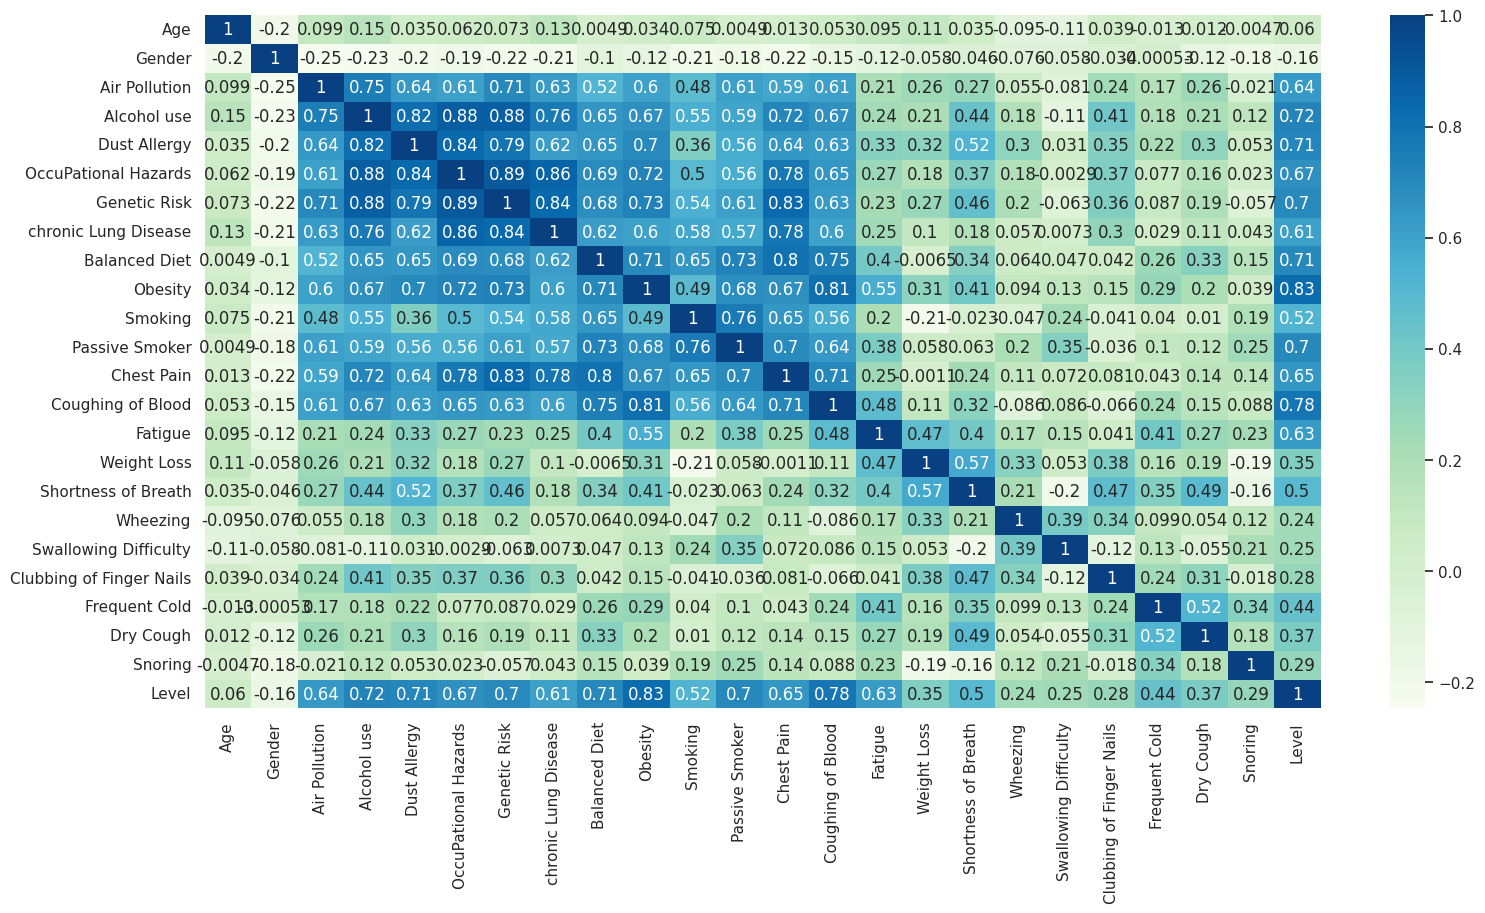

In [15]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.show()

In [16]:
df['Smoking'].corr(df['Passive Smoker'])

0.7616215035339878

<Axes: >

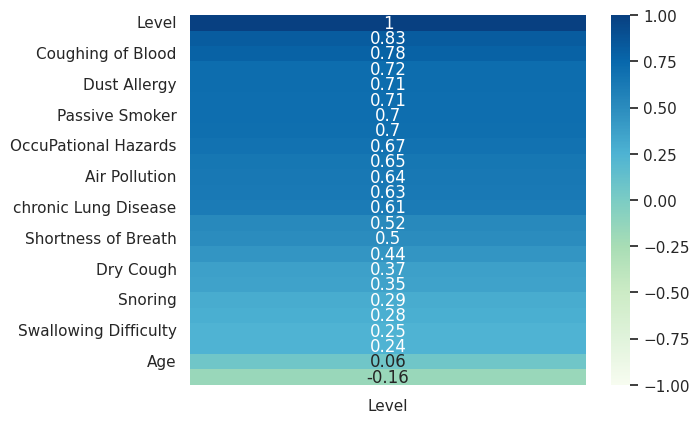

In [17]:
sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [18]:
df.columns


Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [19]:
df=df[['Age','Coughing of Blood','Dust Allergy','Passive Smoker','OccuPational Hazards','Air Pollution','chronic Lung Disease','Shortness of Breath','Dry Cough','Snoring','Swallowing Difficulty','Level']]

In [20]:
df.head()

,Age,Coughing of Blood,Dust Allergy,Passive Smoker,OccuPational Hazards,Air Pollution,chronic Lung Disease,Shortness of Breath,Dry Cough,Snoring,Swallowing Difficulty,Level
0,33,4,5,2,4,2,2,2,3,4,3,1
1,17,3,5,4,3,3,2,7,7,2,6,2
2,35,8,6,3,5,4,4,9,7,2,1,3
3,37,8,7,7,7,7,7,3,7,5,4,3
4,46,9,7,7,7,6,6,4,2,3,4,3


In [21]:
df['Level'].value_counts()

Level
3    365
2    332
1    303
Name: count, dtype: int64

In [22]:
X=df.drop('Level',axis=1)

y=df['Level']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)


In [24]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(solver='liblinear')
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [25]:
y_test_hat = Classifier.predict(X_test)

In [26]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat})
Results.head(10)

,Actual,Predictions
507,2,2
818,1,1
452,2,1
368,1,1
242,3,3
929,1,1
262,1,1
810,1,2
318,3,3
49,1,1


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))


0.9033333333333333


In [28]:
y_train_hat = Classifier.predict(X_train)

print(accuracy_score(y_train,y_train_hat))

0.9257142857142857




**Checking model predicted probabilities**¶

In [29]:
y_test_hat_proba = Classifier.predict_proba(X_test)

print(y_test_hat_proba.shape)

(300, 3)


In [30]:
y_test_hat_proba[0:5,:]

array([[1.92900714e-01, 8.06456896e-01, 6.42390023e-04],
       [9.03129396e-01, 6.63700845e-02, 3.05005191e-02],
       [5.87225851e-01, 2.35880913e-02, 3.89186058e-01],
       [8.69331652e-01, 9.85918394e-04, 1.29682430e-01],
       [1.73206890e-03, 1.61337695e-01, 8.36930236e-01]])

In [31]:
# Given array in scientific notation
array_in_scientific = y_test_hat_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.1929007139938051' '0.8064568959835468' '0.0006423900226482']
 ['0.9031293963723793' '0.0663700844845793' '0.0305005191430414']
 ['0.5872258507426156' '0.0235880912858157' '0.3891860579715688']
 ['0.8693316521030360' '0.0009859183941061' '0.1296824295028579']
 ['0.0017320688958063' '0.1613376951254041' '0.8369302359787896']]


In [32]:
# Compare the predicted values with the actuals along with the predicted probability that the class is "M".

pls = y_test_hat_proba[:,1]

Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat,'Prob(Class = 3)':pls})

Results.head(5)

,Actual,Predictions,Prob(Class = 3)
507,2,2,0.806457
818,1,1,0.066370
452,2,1,0.023588
368,1,1,0.000986
242,3,3,0.161338


In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_hat)

print(cm)

[[ 71  18   0]
 [  7  85   4]
 [  0   0 115]]


Text(91.25, 0.5, 'True Label')

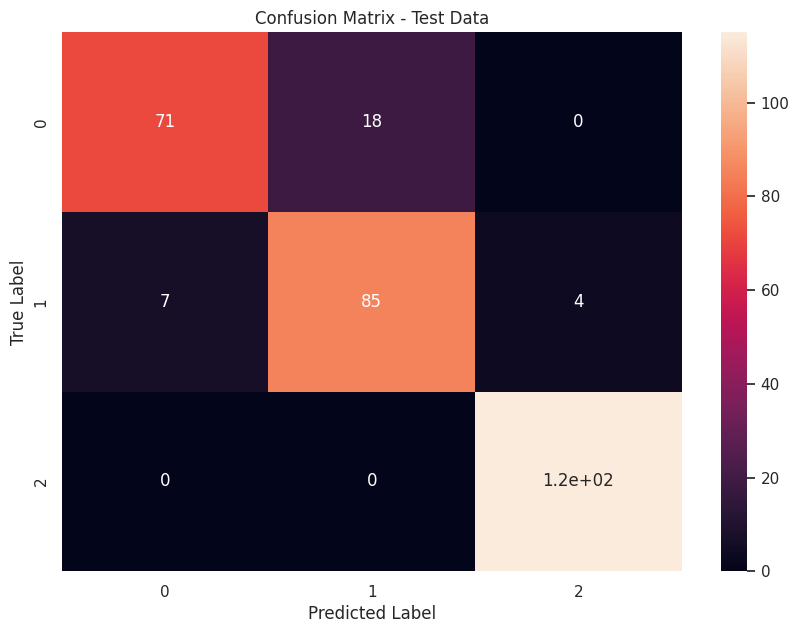

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [35]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [36]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_test_hat, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_test_hat, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_test_hat))
    print("F1 Score : ", f1_score(y_test, y_test_hat, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_test_hat))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

Precision :  0.9033333333333333
Recall :  0.9033333333333333
Accuracy :  0.9033333333333333
F1 Score :  0.9033333333333333

 [[ 71  18   0]
 [  7  85   4]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           1       0.91      0.80      0.85        89
           2       0.83      0.89      0.85        96
           3       0.97      1.00      0.98       115

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.90      0.90      0.90       300

******************************************************



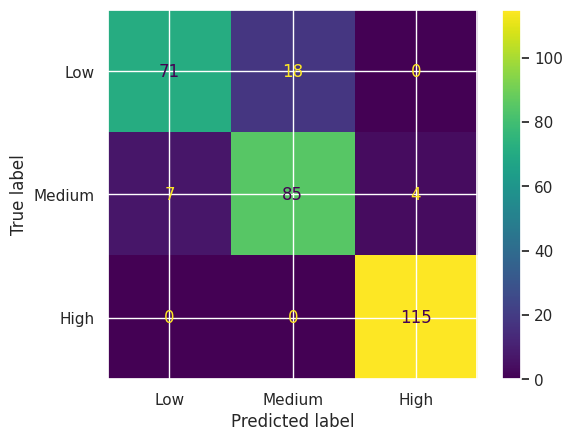

In [37]:
perform(y_test_hat)

Calculate common error metrics for a 2-class classifier


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           1       0.91      0.80      0.85        89
           2       0.83      0.89      0.85        96
           3       0.97      1.00      0.98       115

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.90      0.90      0.90       300

